In [85]:
import tensorflow as ts
from tensorflow import keras
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv("telco_customer_churn.csv")
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [3]:
# Droping useless columns
df.drop("customerID", axis=1, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [5]:
pd.to_numeric(df.TotalCharges, errors="coerce").isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [6]:
# Seeing the rows where TotalCharges has no value 
df[pd.to_numeric(df.TotalCharges, errors="coerce").isnull()]

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female              0     Yes        Yes       0           No   
753     Male              0      No        Yes       0          Yes   
936   Female              0     Yes        Yes       0          Yes   
1082    Male              0     Yes        Yes       0          Yes   
1340  Female              0     Yes        Yes       0           No   
3331    Male              0     Yes        Yes       0          Yes   
3826    Male              0     Yes        Yes       0          Yes   
4380  Female              0     Yes        Yes       0          Yes   
5218    Male              0     Yes        Yes       0          Yes   
6670  Female              0     Yes        Yes       0          Yes   
6754    Male              0      No        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
488   No phone service             DSL                  Yes   
753                 No              No  No internet service   
936                 No             DSL                  Yes   
1082               Yes              No  No internet service   
1340  No phone service             DSL                  Yes   
3331                No              No  No internet service   
3826               Yes              No  No internet service   
4380                No              No  No internet service   
5218                No              No  No internet service   
6670               Yes             DSL                   No   
6754               Yes             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
488                    No                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                  Yes                   No   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                  Yes                   No                  Yes   

              StreamingTV      StreamingMovies  Contract PaperlessBilling  \
488                   Yes                   No  Two year              Yes   
753   No internet service  No internet service  Two year               No   
936                   Yes                  Yes  Two year               No   
1082  No internet service  No internet service  Two year               No   
1340                  Yes                   No  Two year               No   
3331  No internet service  No internet service  Two year               No   
3826  No internet service  No internet service  Two year               No   
4380  No internet service  No internet service  Two year               No   
5218  No internet service  No internet service  One year              Yes   
6670                  Yes                   No  Two year               No   
6754                   No                   No  Two year              Yes   

                  PaymentMethod  MonthlyCharges TotalCharges Churn  
488   Bank transfer (automatic)           52.55                 No  
753                Mailed check           20.25                 No  
936                Mailed check           80.85                 No  
1082               Mailed check           25.75                 No  
1340    Credit card (automatic)           56.05                 No  
3331               Mailed check           19.85                 No  
3826               Mailed check           25.35                 No  
4380               Mailed check           20.00                 No

In [7]:
# Dropping those rows
df1 = df[df.TotalCharges != " "]
df1.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [8]:
# Converting datatype of TotalCharges to float
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)
df1.dtypes

<ipython-input-8-3451dffd36af>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

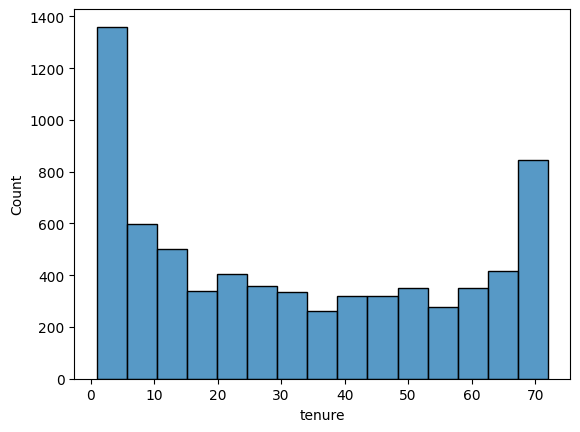

In [10]:
# Number of months the customer has stayed with the company
sns.histplot(data=df1, x="tenure")
plt.show()

<ipython-input-11-0310b48de4e6>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tenure_churn_no = df1[df.Churn == "No"].tenure
<ipython-input-11-0310b48de4e6>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tenure_churn_yes = df1[df.Churn == "Yes"].tenure


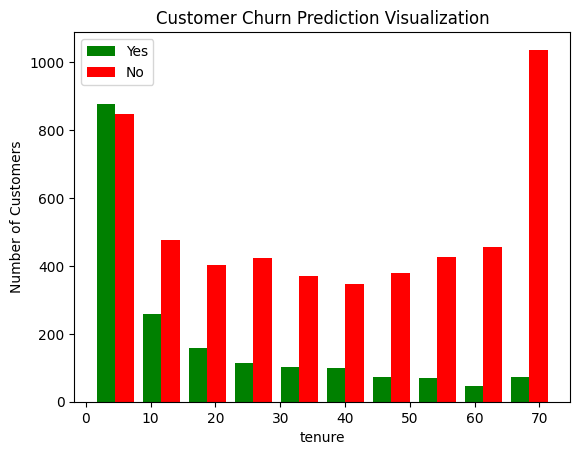

In [11]:
tenure_churn_no = df1[df.Churn == "No"].tenure
tenure_churn_yes = df1[df.Churn == "Yes"].tenure
plt.hist([tenure_churn_yes, tenure_churn_no], label=["Yes","No"], color=["green","red"])
plt.legend()
plt.xlabel("tenure")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")
plt.show()

<ipython-input-12-78a43a4e0b97>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tenure_churn_no = df1[df.Churn == "No"].MonthlyCharges
<ipython-input-12-78a43a4e0b97>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tenure_churn_yes = df1[df.Churn == "Yes"].MonthlyCharges


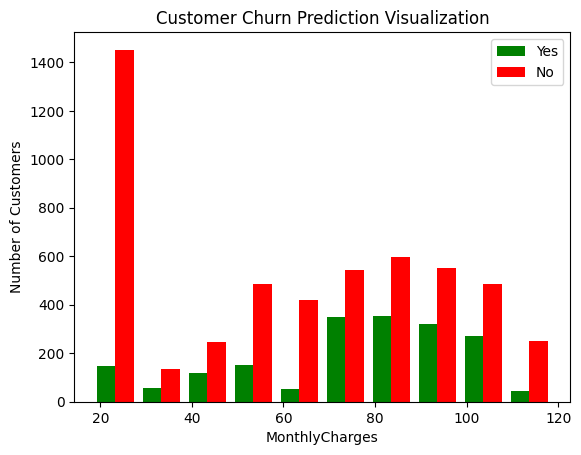

In [12]:
tenure_churn_no = df1[df.Churn == "No"].MonthlyCharges
tenure_churn_yes = df1[df.Churn == "Yes"].MonthlyCharges
plt.hist([tenure_churn_yes, tenure_churn_no], label=["Yes","No"], color=["green","red"])
plt.legend()
plt.xlabel("MonthlyCharges")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")
plt.show()

In [13]:
def print_unique_col_val(df1):
  # Getting an information about unique values of each column
  for column in df1:
    if df1[column].dtype == "object":
      print(f"Column is {column}:",df1[column].unique())

In [14]:
# replacing No service with No as both mean the same thing
df1.replace("No internet service", "No", inplace=True)
df1.replace("No phone service", "No", inplace=True)

<ipython-input-14-5ed12ee17cc9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace("No internet service", "No", inplace=True)
<ipython-input-14-5ed12ee17cc9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace("No phone service", "No", inplace=True)


In [15]:
print_unique_col_val(df1)

Column is gender: ['Female' 'Male']
Column is Partner: ['Yes' 'No']
Column is Dependents: ['No' 'Yes']
Column is PhoneService: ['No' 'Yes']
Column is MultipleLines: ['No' 'Yes']
Column is InternetService: ['DSL' 'Fiber optic' 'No']
Column is OnlineSecurity: ['No' 'Yes']
Column is OnlineBackup: ['Yes' 'No']
Column is DeviceProtection: ['No' 'Yes']
Column is TechSupport: ['No' 'Yes']
Column is StreamingTV: ['No' 'Yes']
Column is StreamingMovies: ['No' 'Yes']
Column is Contract: ['Month-to-month' 'One year' 'Two year']
Column is PaperlessBilling: ['Yes' 'No']
Column is PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Column is Churn: ['No' 'Yes']


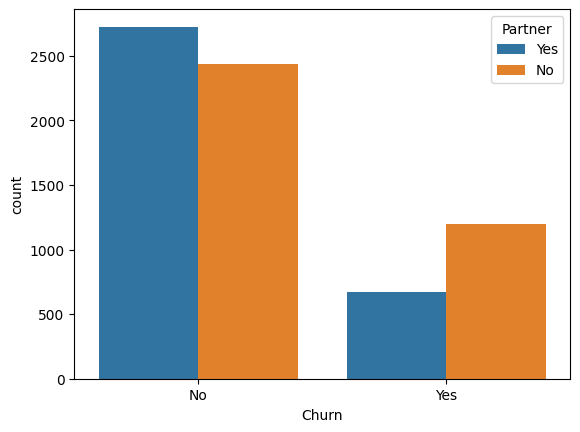

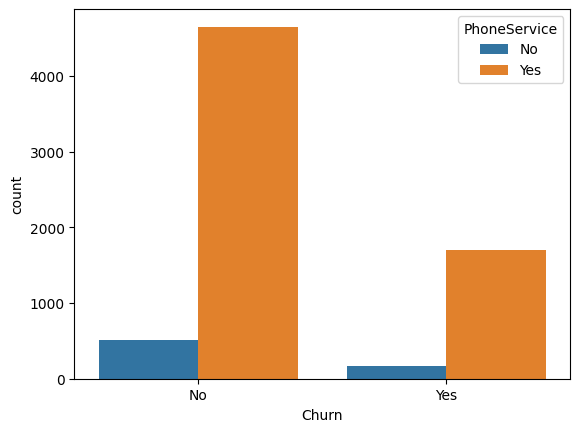

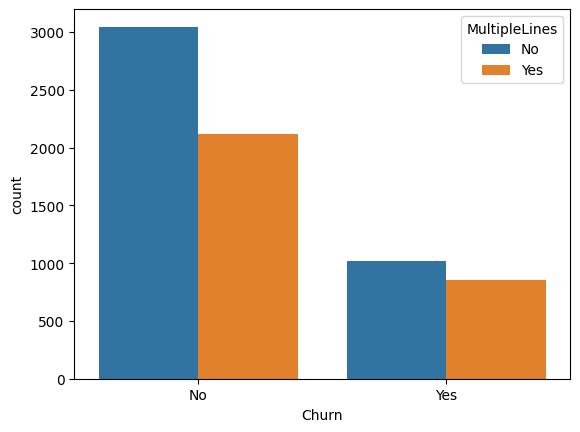

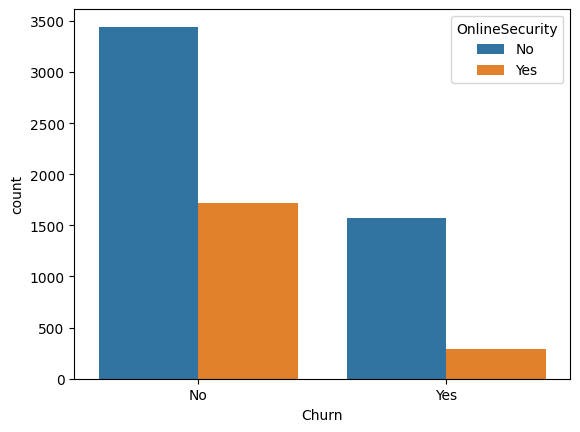

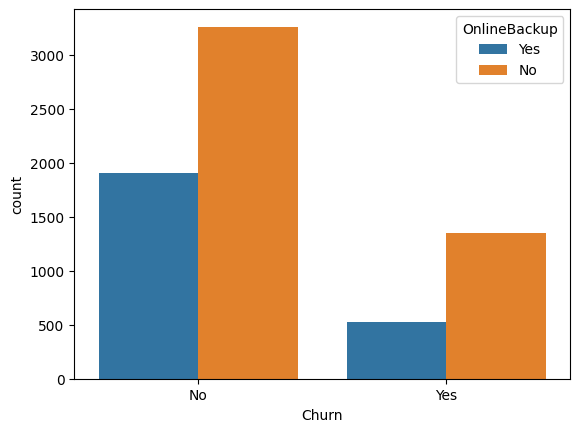

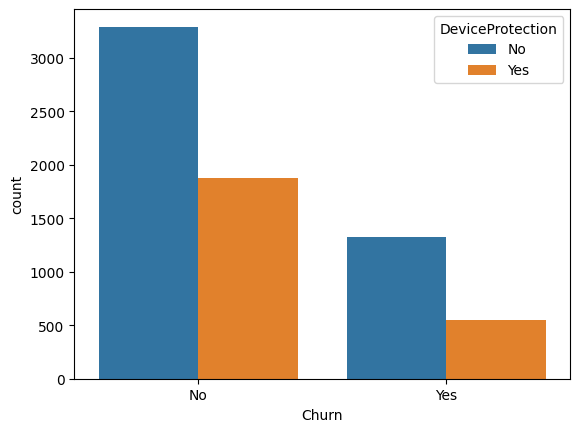

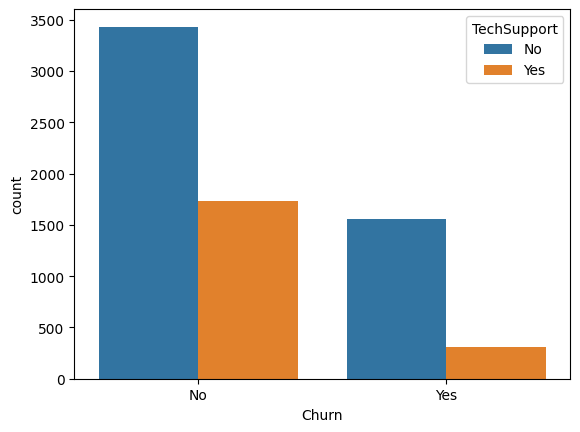

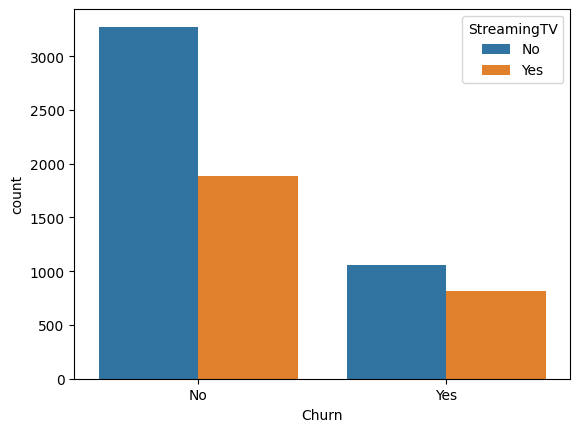

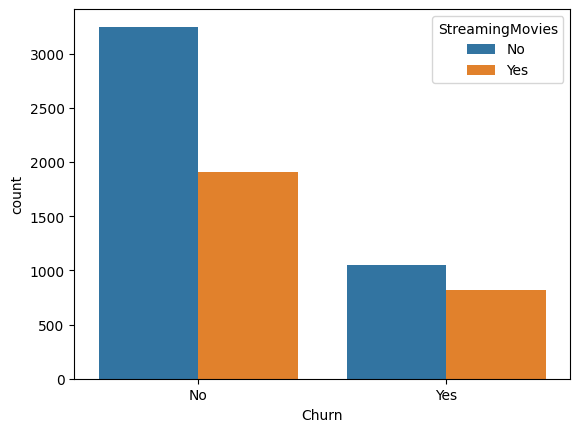

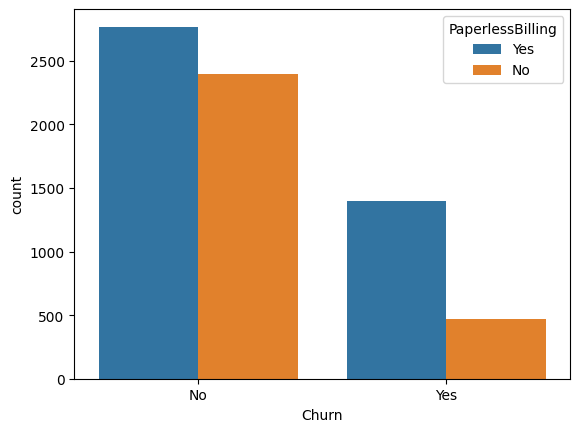

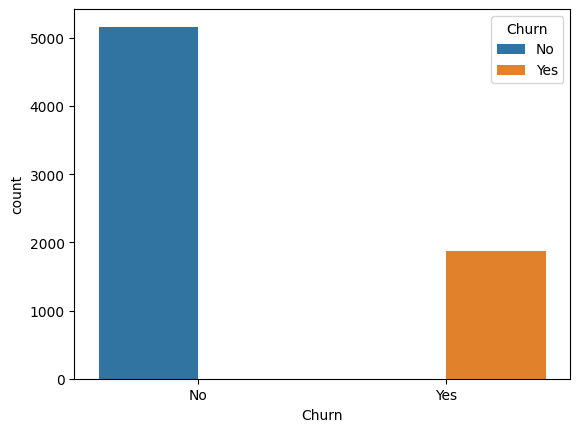

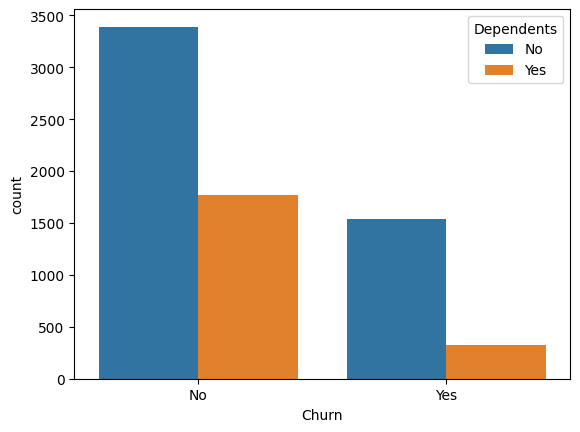

In [16]:
yes_no_cols = ["Partner","PhoneService","MultipleLines","OnlineSecurity","OnlineBackup",
               "DeviceProtection","TechSupport","StreamingTV","StreamingMovies","PaperlessBilling","Churn", "Dependents"]

for col in yes_no_cols:
  sns.countplot(data=df1, x="Churn", hue=col)
  plt.show()

In [17]:
# applying label encoding manually
for col in yes_no_cols:
  df1[col].replace({"Yes":1,"No":0}, inplace=True)

print_unique_col_val(df1)

Column is gender: ['Female' 'Male']
Column is InternetService: ['DSL' 'Fiber optic' 'No']
Column is Contract: ['Month-to-month' 'One year' 'Two year']
Column is PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


<ipython-input-17-46957befda41>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({"Yes":1,"No":0}, inplace=True)


In [18]:
df1["Churn"].unique()


array([0, 1])

In [19]:
df1.gender.replace({"Female": 1, "Male": 0}, inplace=True)

<ipython-input-19-7552ca47f8c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.gender.replace({"Female": 1, "Male": 0}, inplace=True)


In [20]:
df1.gender.unique()

array([1, 0])

In [21]:
# applying onehotencoding to columns which have more than two unique value
df2 = pd.get_dummies(data=df1, columns=["InternetService","PaymentMethod","Contract"])
df2.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       1              0        1           0       1             0   
1       0              0        0           0      34             1   
2       0              0        0           0       2             1   
3       0              0        0           0      45             0   
4       1              0        0           0       2             1   

   MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0              0               0             1                 0  ...   
1              0               1             0                 1  ...   
2              0               1             1                 0  ...   
3              0               1             0                 1  ...   
4              0               0             0                 0  ...   

   InternetService_DSL  InternetService_Fiber optic  InternetService_No  \
0                    1                            0                   0   
1                    1                            0                   0   
2                    1                            0                   0   
3                    1                            0                   0   
4                    0                            1                   0   

   PaymentMethod_Bank transfer (automatic)  \
0                                        0   
1                                        0   
2                                        0   
3                                        1   
4                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  Contract_Month-to-month  Contract_One year  \
0                           0                        1                  0   
1                           1                        0                  1   
2                           1                        1                  0   
3                           0                        0                  1   
4                           0                        1                  0   

   Contract_Two year  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  

[5 rows x 27 columns]

In [22]:
# Normalizing the data
cols_to_scale = ["tenure","MonthlyCharges","TotalCharges"]

scaler = sklearn.preprocessing.MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [23]:
df2.head()

gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0       1              0        1           0  0.000000             0   
1       0              0        0           0  0.464789             1   
2       0              0        0           0  0.014085             1   
3       0              0        0           0  0.619718             0   
4       1              0        0           0  0.014085             1   

   MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0              0               0             1                 0  ...   
1              0               1             0                 1  ...   
2              0               1             1                 0  ...   
3              0               1             0                 1  ...   
4              0               0             0                 0  ...   

   InternetService_DSL  InternetService_Fiber optic  InternetService_No  \
0                    1                            0                   0   
1                    1                            0                   0   
2                    1                            0                   0   
3                    1                            0                   0   
4                    0                            1                   0   

   PaymentMethod_Bank transfer (automatic)  \
0                                        0   
1                                        0   
2                                        0   
3                                        1   
4                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  Contract_Month-to-month  Contract_One year  \
0                           0                        1                  0   
1                           1                        0                  1   
2                           1                        1                  0   
3                           0                        0                  1   
4                           0                        1                  0   

   Contract_Two year  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  

[5 rows x 27 columns]

In [24]:
X = df2.drop("Churn", axis=1)
y = df2["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23, stratify=y)
y_test.value_counts()

0    1033
1     374
Name: Churn, dtype: int64

In [25]:
X_train.shape

(5625, 26)

In [26]:
X_test.shape

(1407, 26)

In [27]:
# Creating the deep learning model
model = keras.Sequential()
# model.add(keras.layers.Dense(80, activation="tanh", input_shape=(26,)))
# model.add(keras.layers.Dense(60, activation="tanh"))
model.add(keras.layers.Dense(20, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))

In [28]:
# Compiling the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [29]:
model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
141/141 [==============================] - 6s 5ms/step - loss: 0.5107 - accuracy: 0.7476 - val_loss: 0.4614 - val_accuracy: 0.7804
Epoch 2/100
141/141 [==============================] - 1s 4ms/step - loss: 0.4391 - accuracy: 0.7967 - val_loss: 0.4455 - val_accuracy: 0.7911
Epoch 3/100
141/141 [==============================] - 1s 6ms/step - loss: 0.4261 - accuracy: 0.7982 - val_loss: 0.4451 - val_accuracy: 0.7813
Epoch 4/100
141/141 [==============================] - 1s 6ms/step - loss: 0.4221 - accuracy: 0.8029 - val_loss: 0.4371 - val_accuracy: 0.7956
Epoch 5/100
141/141 [==============================] - 1s 6ms/step - loss: 0.4186 - accuracy: 0.8036 - val_loss: 0.4373 - val_accuracy: 0.7947
Epoch 6/100
141/141 [==============================] - 1s 4ms/step - loss: 0.4162 - accuracy: 0.8078 - val_loss: 0.4338 - val_accuracy: 0.7964
Epoch 7/100
141/141 [==============================] - 1s 4ms/step - loss: 0.4142 - accuracy: 0.8067 - val_loss: 0.4349 - val_accuracy: 0.7982

In [30]:
model.evaluate(X_test, y_test)[1]

44/44 [==============================] - 0s 2ms/step - loss: 0.4312 - accuracy: 0.7960


0.7960199117660522

In [31]:
preds = model.predict(X_test)
preds[:15]

44/44 [==============================] - 1s 4ms/step


array([[0.18592697],
       [0.5387112 ],
       [0.02014836],
       [0.8288466 ],
       [0.5582197 ],
       [0.08325629],
       [0.3255778 ],
       [0.61428356],
       [0.15940842],
       [0.45965973],
       [0.0132775 ],
       [0.01355074],
       [0.10290919],
       [0.8687129 ],
       [0.6955067 ]], dtype=float32)

In [32]:
preds_ = [round(val[0]) for val in preds]

pd.DataFrame({"Actual": y_test[:20],"Predicted": preds_[:20]})

Actual  Predicted
1922       0          0
3026       1          1
1295       0          0
3975       1          1
1899       0          1
4142       0          0
617        0          0
3006       1          1
3127       1          0
4588       0          0
3056       0          0
2696       0          0
1657       0          0
3497       0          1
2957       0          1
5649       0          0
6058       0          0
1054       1          1
3767       0          0
1407       0          0

<Axes: >

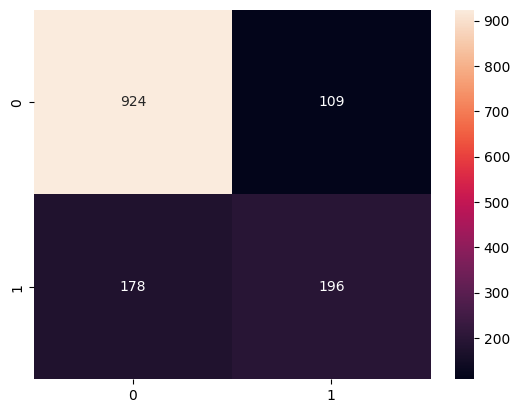

In [33]:
sns.heatmap(sklearn.metrics.confusion_matrix(y_test, preds_), annot=True, fmt="")

In [34]:
print(sklearn.metrics.classification_report(y_test, preds_))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1033
           1       0.64      0.52      0.58       374

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



In [109]:
# Conclusion: In the first place i cleaned the data and prepared it for creating the deep learning model
# While doing so i also visualized the data to get an genaral information about the dataset that i have
# Then i started creating the model. And my model worked with 82 percent accuracy on the train dataset
# And it performed well on the test dataset as well. 
# But as the dataset was inbalanced so we got low precision , recall and f1-score scores. 
# Let's apply some techniques to make the dataset balanced dataset

In [119]:
# creating the function to create the model easily
def ANN(X_train, X_test, y_train, y_test, loss, weights):
  model = keras.Sequential([
      keras.layers.Dense(26, activation="relu"),
      keras.layers.Dense(15, activation="relu"),
      keras.layers.Dense(1, activation="sigmoid")
  ])

  model.compile(optimizer="adam", loss=loss, metrics=["accuracy"])

  if weights == -1:
    model.fit(X_train, y_train, epochs=100)

  else:
    model.fit(X_train, y_train, epochs=100, class_weights = weights)
  
  print(model.evaluate(X_test, y_test))

  y_preds = model.predict(X_test)
  y_preds = np.round(y_preds)

  print(sklearn.metrics.classification_report(y_test, y_preds))

  return y_preds

In [111]:
y_preds = ANN(X_train, X_test, y_train, y_test, "binary_crossentropy", -1)
y_preds

Epoch 1/100
176/176 [==============================] - 4s 7ms/step - loss: 0.4890 - accuracy: 0.7529
Epoch 2/100
176/176 [==============================] - 1s 7ms/step - loss: 0.4300 - accuracy: 0.7934
Epoch 3/100
176/176 [==============================] - 1s 8ms/step - loss: 0.4231 - accuracy: 0.7975
Epoch 4/100
176/176 [==============================] - 1s 8ms/step - loss: 0.4179 - accuracy: 0.8016
Epoch 5/100
176/176 [==============================] - 2s 9ms/step - loss: 0.4151 - accuracy: 0.8004
Epoch 6/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4123 - accuracy: 0.8076
Epoch 7/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4101 - accuracy: 0.8075
Epoch 8/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4068 - accuracy: 0.8075
Epoch 9/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4048 - accuracy: 0.8060
Epoch 10/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4031 - accura

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [1.]], dtype=float32)

In [ ]:
# First method is to create sample data to make the dataset balanced dataset

In [66]:
count_churn_0, count_churn_1 = df2.Churn.value_counts()

In [46]:
count_churn_0, count_churn_1

(5163, 1869)

In [47]:
churn_0_df = df2[df2.Churn == 0]
churn_1_df = df2[df2.Churn == 1]


In [49]:
churn_0_df.sample(count_churn_1).shape

(1869, 27)

In [52]:
df_class_0_under = churn_0_df.sample(count_churn_1)

df_test = pd.concat([df_class_0_under, churn_1_df]).sort_index()
df_test.shape

(3738, 27)

In [53]:
df_test[["Churn"]].head(10)

Churn
1       0
2       1
3       0
4       1
5       1
7       0
8       1
13      1
14      0
18      1

In [75]:

X_tr, X_t, y_tr, y_t = train_test_split(df_test.drop("Churn", axis=1), df_test["Churn"], test_size=0.2, random_state=23, stratify=df_test["Churn"])
X_tr.shape

(2990, 26)

In [112]:
# Creating the model using balanced the dataset
test_preds = ANN(X_tr, X_t, y_tr, y_t, loss="binary_crossentropy", weights=-1)


Epoch 1/100
94/94 [==============================] - 2s 4ms/step - loss: 0.5959 - accuracy: 0.7161
Epoch 2/100
94/94 [==============================] - 0s 4ms/step - loss: 0.5010 - accuracy: 0.7602
Epoch 3/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4888 - accuracy: 0.7692
Epoch 4/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4868 - accuracy: 0.7732
Epoch 5/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4815 - accuracy: 0.7732
Epoch 6/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4771 - accuracy: 0.7793
Epoch 7/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4742 - accuracy: 0.7766
Epoch 8/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4723 - accuracy: 0.7809
Epoch 9/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4672 - accuracy: 0.7803
Epoch 10/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4659 - accuracy: 0.7806
Epoch 11/

In [86]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [113]:
# next method is to use SMOTE to balance the dataset

In [93]:
smote = SMOTE(sampling_strategy="minority")
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [94]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_sm, y_sm, test_size=0.2, stratify=y_sm, random_state=23)
y_train2.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [120]:
# Creating the model using the dataset that was balanced using SMOTE
sm_preds = ANN(X_train2, X_test2, y_train2, y_test2, "binary_crossentropy", -1)

Epoch 1/100
259/259 [==============================] - 2s 4ms/step - loss: 0.5144 - accuracy: 0.7607
Epoch 2/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4684 - accuracy: 0.7762
Epoch 3/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4610 - accuracy: 0.7800
Epoch 4/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4559 - accuracy: 0.7826
Epoch 5/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4502 - accuracy: 0.7862
Epoch 6/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4464 - accuracy: 0.7893
Epoch 7/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4430 - accuracy: 0.7880
Epoch 8/100
259/259 [==============================] - 1s 6ms/step - loss: 0.4391 - accuracy: 0.7915
Epoch 9/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4354 - accuracy: 0.7936
Epoch 10/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4325 - accura

In [121]:
# Conclusion: Finnaly I have achieved again good result on the test data.
# So I have used several techniques to make the dataset balanced one.
# When i used SMOTE technique, Model generalized well on the unseen data too. 
# Accuracy is 81 percent which is not bad
# Moreover we also improved precision, recall and f1-score scores by applying SMOTE 